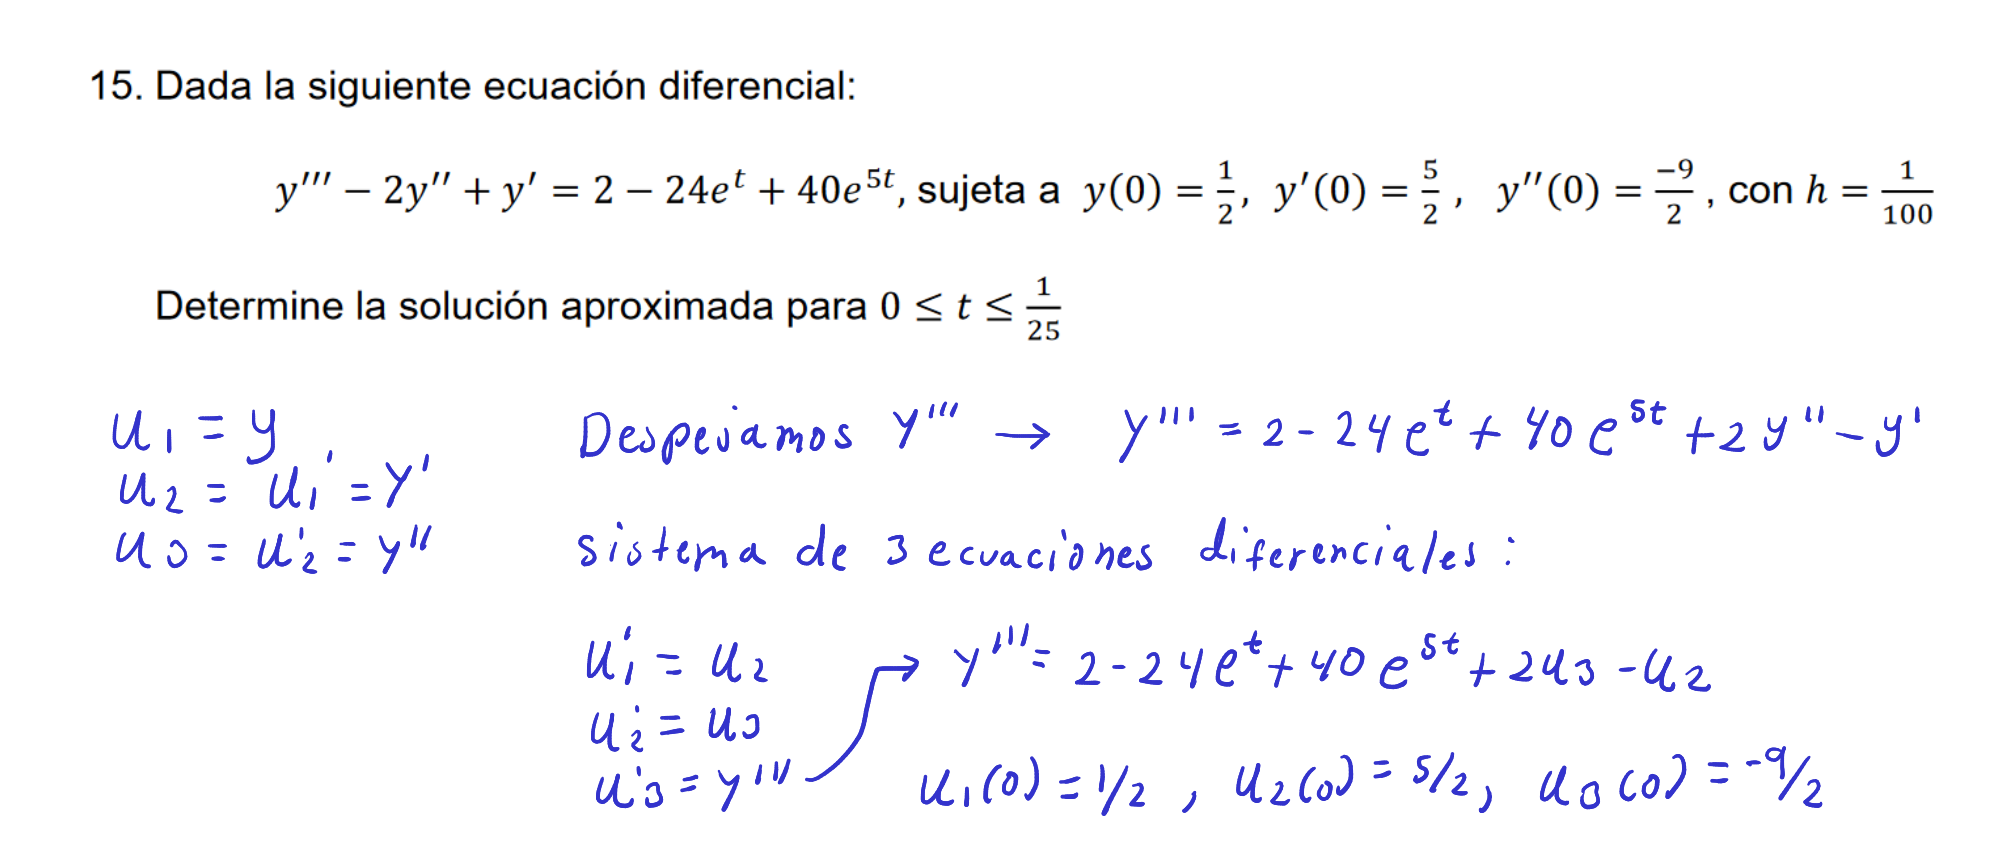

In [4]:
from sympy import *
from numpy import arange

fy = symbols("fy", cls=Function)
t, y, u1, u2, u3 = symbols("t y u1 u2 u3")

h = 1/100

#eq = Eq(fy(t).diff(), 1 / (exp(fy(t)/t)) + fy(t) / t)
fu1 = u2
fu2 = u3
fu3 = 2 - 24*exp(t) + 40 * exp(5*t) + 2*u3 - u2

display(fu1)
display(fu2)
display(fu3)

u2

u3

-u2 + 2*u3 + 40*exp(5*t) - 24*exp(t) + 2

In [5]:
# Intervalo de T
T = [t for t in arange(start=0,stop=1/25 + h/2, step=h)]
T

[0.0, 0.01, 0.02, 0.03, 0.04]

In [7]:
# Listas con los valores iniciales
# Para este caso

U1 = [0.5]
U2 = [2.5]
U3 = [-4.5]

# Hago un for para calcular los K y U
for i in range(0, len(T) -1):
    k11 = fu1.subs({t: T[i], u1: U1[i], u2:U2[i], u3:U3[i]})
    k12 = fu2.subs({t: T[i], u1: U1[i], u2:U2[i], u3:U3[i]})
    k13 = fu3.subs({t: T[i], u1: U1[i], u2:U2[i], u3:U3[i]})

    k21 = fu1.subs({t: T[i] + h/2, u1: U1[i] + (k11*h)/2, u2:U2[i] + (k12*h)/2, u3:U3[i]+ (k13*h)/2})
    k22 = fu2.subs({t: T[i] + h/2, u1: U1[i] + (k11*h)/2, u2:U2[i] + (k12*h)/2, u3:U3[i]+ (k13*h)/2})
    k23 = fu3.subs({t: T[i] + h/2, u1: U1[i] + (k11*h)/2, u2:U2[i] + (k12*h)/2, u3:U3[i]+ (k13*h)/2})

    k31 = fu1.subs({t: T[i] + h/2, u1: U1[i] + (k21*h)/2, u2:U2[i] + (k22*h)/2, u3:U3[i]+ (k23*h)/2})
    k32 = fu2.subs({t: T[i] + h/2, u1: U1[i] + (k21*h)/2, u2:U2[i] + (k22*h)/2, u3:U3[i]+ (k23*h)/2})
    k33 = fu3.subs({t: T[i] + h/2, u1: U1[i] + (k21*h)/2, u2:U2[i] + (k22*h)/2, u3:U3[i]+ (k23*h)/2})

    k41 = fu1.subs({t: T[i] + h, u1: U1[i] + k31*h, u2:U2[i] + k32*h, u3:U3[i] + k33*h})
    k42 = fu2.subs({t: T[i] + h, u1: U1[i] + k31*h, u2:U2[i] + k32*h, u3:U3[i] + k33*h})
    k43 = fu3.subs({t: T[i] + h, u1: U1[i] + k31*h, u2:U2[i] + k32*h, u3:U3[i] + k33*h})

    U1.append(U1[i] + (h/6)*(k11 + 2*k21 + 2*k31 + k41))
    U2.append(U2[i] + (h/6)*(k12 + 2*k22 + 2*k32 + k42))
    U3.append(U3[i] + (h/6)*(k13 + 2*k23 + 2*k33 + k43))

print(U1)
print(U2)
print(U3)

[0.5, 0.524776164983693, 0.549109993266311, 0.573011062672004, 0.596491174228844]
[2.5, 2.45535782073640, 2.41156724509903, 2.36884308719231, 2.32741531222300]
[-4.5, -4.42509576163352, -4.32944031728115, -4.21155975853864, -4.06989706127869]


In [ ]:
# Pruebo la evaluación exacta para verificar contra y
eq = Eq(fy(t).diff(t, 3)- 2*fy(t).diff(t, 2) + fy(t).diff() , 2 - 24*exp(t) + 40*exp(5*t))
condiciones_iniciales = {fy(t).subs(t, 0):0.5,fy(t).diff().subs(t,0): 2.5, fy(t).diff(t ,2).subs(t,0): -4.5 }
F = dsolve(eq, ics=condiciones_iniciales)
F

solucion_exacta = []
for i in range(len(T)):
    solucion_exacta.append(float(F.rhs.subs({t: T[i]})))
solucion_exacta

In [18]:
# Ponemos los datos en una tabla

from utils import imprimir_tabla

lista_tabla = [["ti", "U1", "U2", "U3", "Exacta U1", "Erro"]]

for i in range(len(T)):
    lista_tabla.append(
        [
            str(float(T[i])),
            str(float(U1[i])),
            str(float(U2[i])),
            str(float(U3[i])),
            str(solucion_exacta[i]),
            str(f"{abs(U1[i] - solucion_exacta[i]):.5E}"),
        ]
    )

imprimir_tabla(lista_tabla)

┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ ti   ┃ U1                 ┃ U2                 ┃ U3                 ┃ Exacta U1          ┃ Erro        ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ 0.0  │ 0.5                │ 2.5                │ -4.5               │ 0.5                │ 0.00000E+00 │
│ 0.01 │ 0.5247761649836934 │ 2.4553578207363986 │ -4.425095761633518 │ 0.5247761650992384 │ 1.15545E-10 │
│ 0.02 │ 0.5491099932663112 │ 2.4115672450990275 │ -4.32944031728115  │ 0.5491099935161969 │ 2.49886E-10 │
│ 0.03 │ 0.5730110626720042 │ 2.3688430871923134 │ -4.211559758538641 │ 0.5730110630762066 │ 4.04202E-10 │
│ 0.04 │ 0.5964911742288438 │ 2.327415312223     │ -4.069897061278691 │ 0.5964911748085804 │ 5.79737E-10 │
└──────┴────────────────────┴────────────────────┴────────────────────┴────────────────────┴─────────────┘